# Portfolio Example: Sales Analysis & Prediction
# Author: MinSet Khant
# Date: 2025-12-17
This portfolio showcases a comprehensive sales analysis and prediction project using Python. The project involves data cleaning, exploratory data analysis (EDA), visualization, and predictive modeling to forecast future sales.

In [3]:
# Step 1: Install and Import Libraries
!pip install -q seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

# Step 2: Generate Synthetic Data
np.random.seed(42)
data = pd.DataFrame({
    'Month': pd.date_range(start='2025-01-01', periods=12, freq='M'),
    'Sales': np.random.randint(1000, 5000, size=12),
    'Advertising': np.random.randint(500, 2000, size=12),
    'Employees': np.random.randint(5, 20, size=12)
})

# Save dataset for portfolio demonstration
data.to_csv('sales_data.csv', index=False)
print("Dataset Sample:")
print(data.head())


Dataset Sample:
       Month  Sales  Advertising  Employees
0 2025-01-31   4174          830          6
1 2025-02-28   4507         1982         16
2 2025-03-31   1860          587          9
3 2025-04-30   2294         1896          5
4 2025-05-31   2130         1623         16


C:\Users\Set Khant\AppData\Local\Temp\ipykernel_16084\3621740594.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2025-01-01', periods=12, freq='M'),


In [5]:
# Step 3: Data Analysis
print("\nData Summary:")
print(data.describe())


Data Summary:
                     Month        Sales  Advertising  Employees
count                   12    12.000000    12.000000  12.000000
mean   2025-07-15 22:00:00  2952.916667  1342.083333  11.833333
min    2025-01-31 00:00:00  1466.000000   587.000000   5.000000
25%    2025-04-22 12:00:00  2121.250000   839.750000   8.250000
50%    2025-07-15 12:00:00  2466.000000  1338.000000  13.500000
75%    2025-10-07 18:00:00  4112.500000  1848.000000  16.000000
max    2025-12-31 00:00:00  4772.000000  1982.000000  17.000000
std                    NaN  1145.050095   520.947992   4.608950


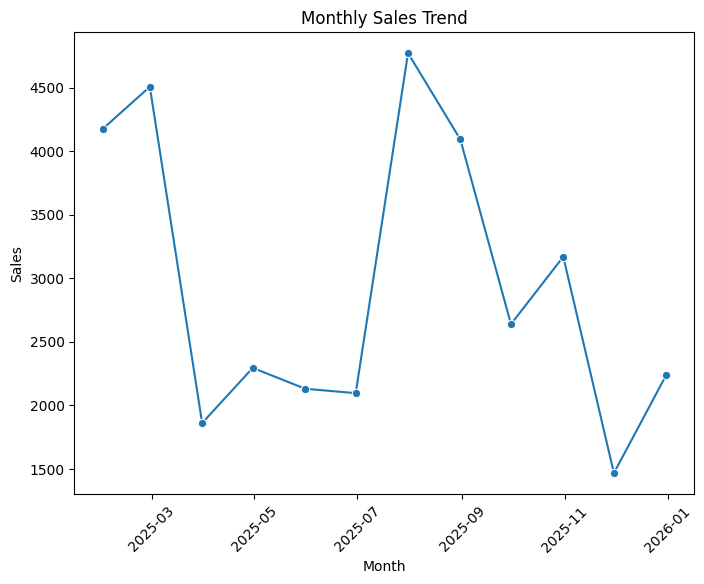

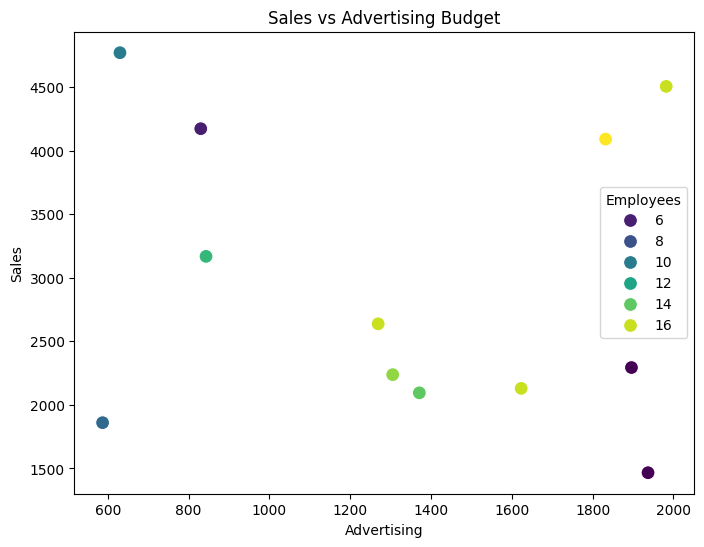

In [7]:
# Step 4: Visualization
plt.figure(figsize=(8,6))
sns.lineplot(x='Month', y='Sales', data=data, marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Advertising', y='Sales', data=data, hue='Employees', palette='viridis', s=100)
plt.title('Sales vs Advertising Budget')
plt.show()

In [8]:
# Step 5: Simple Linear Regression Model
X = data[['Advertising', 'Employees']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Performance:")
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))



Model Performance:
R^2 Score: -0.09350282683969224
Mean Squared Error: 1042814.8018361452


In [9]:
# Step 6: Export Predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('sales_predictions.csv', index=False)
print("\nPredictions Saved:")
print(predictions)


Predictions Saved:
    Actual    Predicted
10    1466  2508.315231
9     3169  2988.702242
0     4174  2522.605243
8     2638  3208.286105
